In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
path = 'data' + os.sep + 'LogiReg_data.txt'
pdData = pd.read_csv(path,header=None,names=['Exam 1','Exam 2', 'Admitted'])
pdData.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
pdData.shape

(100, 3)

In [4]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read CSV (comma-separated) file into DataFrame
    
    Also supports optionally itera

Text(0,0.5,'Exam 2 Score')

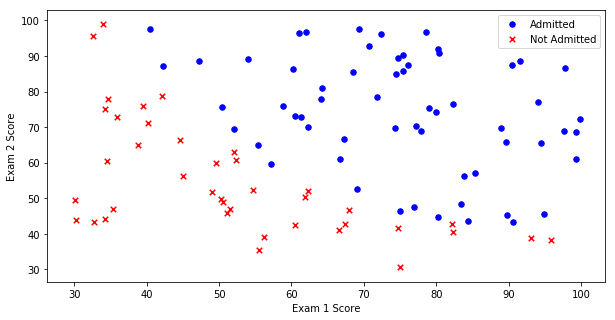

In [5]:
positive = pdData[pdData['Admitted']==1]
negative = pdData[pdData['Admitted']==0]

fig,ax = plt.subplots(figsize=(10,5))

ax.scatter(positive['Exam 1'], positive['Exam 2'], s=30, c='b', marker='o',label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=30, c='r', marker='x',label='Not Admitted')

ax.legend()

ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

<h2>The logistic regression</h2>

目标：建立分类器(求解出三个参数θ0，θ1，θ2)

设定阈值，根据阈值判断录取结果

<h3>要完成的模块</h3>

<ul>
    <li>sigmoid：映射到概率的函数</li>
    <li>model：返回预测结果值</li>
    <li>cost：根据函数计算损失</li>
    <li>gradient：计算每个参数的梯度方向</li>
    <li>descent：进行参数更新</li>
    <li>accuracy：计算精度</li>
</ul>

###  `sigmoid` 函数

$$
g(z) = \frac{1}{1+e^{-z}}   
$$

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

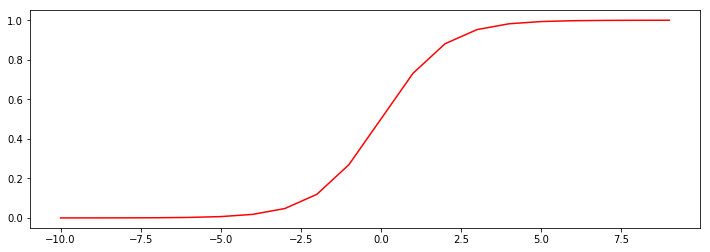

In [7]:
nums = np.arange(-10,10,step=1)
fig,ax = plt.subplots(figsize=(12,4))
ax.plot(nums,sigmoid(nums),'r')

<h2>Sigmoid</h2>
<ul>
    <li>g:R$\rightarrow$[0,1]</li>
    <li>g(0)=0.5</li>
    <li>g(-8)=0</li>
    <li>g(+8)=1</li>
</ul>

In [8]:
def model(X,theta):
    return sigmoid(np.dot(X,theta.T))

In [18]:
# pdData.insert(0,'Ones',1)
# pdData
orig_data = pdData.as_matrix()
cols = orig_data.shape[1]
x = orig_data[:,0:cols-1]
y = orig_data[:,cols-1:cols]

# theta = np.zeros[1,3]
theta = np.zeros([1,3])

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
x[:5]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

In [20]:
y[:5]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [21]:
theta

array([[0., 0., 0.]])

In [22]:
x.shape, y.shape, theta.shape

((100, 3), (100, 1), (1, 3))

### 损失函数
将对数似然函数去负号

$$
D(h_\theta(x), y) = -y\log(h_\theta(x)) - (1-y)\log(1-h_\theta(x))
$$
求平均损失
$$
J(\theta)=\frac{1}{n}\sum_{i=1}^{n} D(h_\theta(x_i), y_i)
$$


In [23]:
def cost(x,y,theta):
    left = np.multiply(-y, np.log(model(x,theta)))
    right = np.multiply(1-y, np.log(1-model(x,theta)))
    return np.sum(left-right)/len(x)

In [24]:
cost(x,y,theta)

0.6931471805599453

### 计算梯度


$$
\frac{\partial J}{\partial \theta_j}=-\frac{1}{m}\sum_{i=1}^n (y_i - h_\theta (x_i))x_{ij}
$$


In [26]:
def gradient(x,y,theta):
    grad = np.zeros(theta.shape)
    error = (model(x,theta)-y).ravel()
    for j in range(len(theta.ravel())):
        term = np.multiply(error, x[:,j])
        grad[0,j] = np.sum(term)/len(x)
    return grad

### Gradient descent

比较3种（批量梯度下降，随机梯度下降，小批量梯度下降）

In [27]:
STOP_ITER = 0
STOP_COST = 1
STOP_GRAD = 2

def stopCriterion(type, value, threshold):
    # 设定三种不同的停止策略
    if type == STOP_ITER:
        return value > threshold
    elif type == STOP_COST:
        return abs(value[-1]-value[-2]) < threshold
    elif type == STOP_GRAD:
        return np.linalg.norm(value) < threshold

In [28]:
import numpy.random
# 洗牌
def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    x = data[:,0:cols-1]
    y = data[:, cols-1:]
    return x,y

In [29]:
import time

def descent(data, theta, batchSize, stopType, thresh, alpha):
    # 梯度下降求解
    
    init_time = time.time()
    i = 0 # 迭代次数
    k = 0 # batch
    x,y = shuffleData(data)
    grad = np.zeros(theta.shape) # 计算的梯度
    costs = [cost(x,y,theta)] # 损失值
    
    while True:
        grad = gradient(x[k:k+batchSize],y[k:k+batchSize],theta)
        k += batchSize # 取batch数量个数据
        if k >= n:
            k = 0
            x,y = shuffleData(data) # 重新洗牌
        theta = theta - alpha*grad # 参数更新
        costs.append(cost(x,y,theta)) # 计算新的损失
        i += 1
        
        if stopType == STOP_ITER:
            value = i
        elif stopType == STOP_COST:
            value = costs
        elif stopType == STOP_GRAD:
            value = grad
        
        if stopCriterion(stopType, value, thresh):
            break
        
    return theta, i-1, costs, grad, time.time() - init_time

In [30]:
def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    theta,iter,costs,grad,dur = descent(data, theta, batchSize, stopType, thresh,alpha)
    name = 'Original' if (data[:,1]>2).sum()>1 else 'Scaled'
    name += 'data - learning rate: {} -'.format(alpha)
    if batchSize == n:
        strDescType = 'Gradient'
    elif batchSize == 1:
        strDescType = 'Stochastic'
    else:
        strDescType = 'Mini-batch({})'.format(thresh)
    name += strDescType + 'descent - Stop:'
    if stopType == STOP_ITER:
        strStop = '{} iterations'.format(thresh)
    elif stopType == STOP_COST:
        strStop = 'costs change < {}'.format(thresh)
    else:
        strStop = 'gradient norm < {}'.format(thresh)
    name += strStop
    
    print('***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s'.format(
        name, theta, iter, costs[-1], dur))
    
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper()+' - Error vs. Iteration')
    return theta
    

### 不停的停止策略

设定迭代次数

***Originaldata - learning rate: 1e-06 -Gradientdescent - Stop:5000 iterations
Theta: [[-0.00027127  0.00705232  0.00376711]] - Iter: 5000 - Last cost: 0.63 - Duration: 1.29s


array([[-0.00027127,  0.00705232,  0.00376711]])

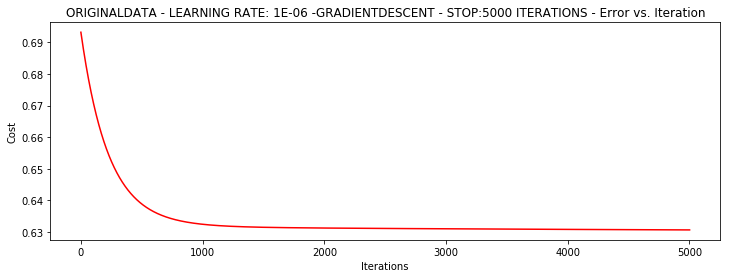

In [31]:
# 选择的梯度下降方法是基于所有样本的
n = 100
runExpe(orig_data, theta, n, STOP_ITER, thresh=5000, alpha=0.000001)

#### 根据损失值停止

设定阈值 1E-6, 差不多需要110 000次迭代 

***Originaldata - learning rate: 0.001 -Gradientdescent - Stop:costs change < 1e-06
Theta: [[-5.13364014  0.04771429  0.04072397]] - Iter: 109901 - Last cost: 0.38 - Duration: 31.00s


array([[-5.13364014,  0.04771429,  0.04072397]])

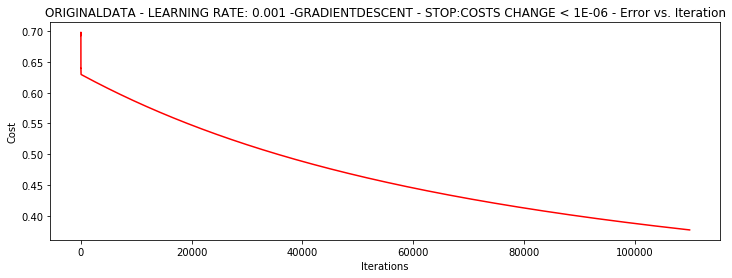

In [34]:
runExpe(orig_data, theta, n ,STOP_COST, thresh=0.000001, alpha=0.001)

#### 根据梯度变化停止

设定阈值 0.05,差不多需要40 000次迭代

***Originaldata - learning rate: 0.001 -Gradientdescent - Stop:gradient norm < 0.05
Theta: [[-2.37033409  0.02721692  0.01899456]] - Iter: 40045 - Last cost: 0.49 - Duration: 12.17s


array([[-2.37033409,  0.02721692,  0.01899456]])

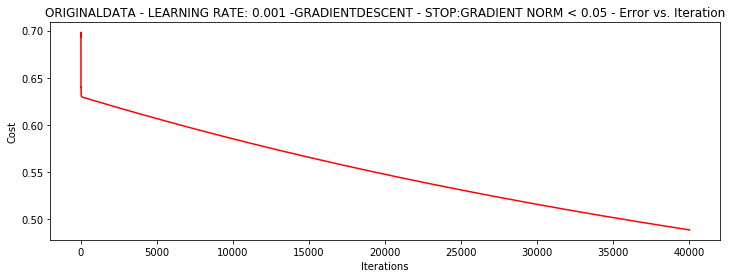

In [35]:
runExpe(orig_data, theta, n, STOP_GRAD, thresh=.05, alpha=0.001)

### 对比不同的梯度下降方法

Stochastic descent

***Originaldata - learning rate: 0.001 -Stochasticdescent - Stop:5000 iterations
Theta: [[-0.38506069  0.07962108  0.0192655 ]] - Iter: 5000 - Last cost: 1.93 - Duration: 0.48s


array([[-0.38506069,  0.07962108,  0.0192655 ]])

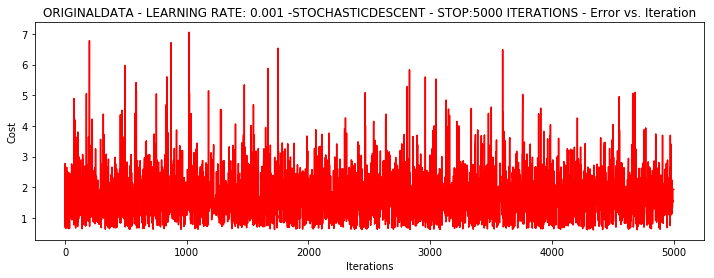

In [36]:
runExpe(orig_data, theta, 1, STOP_ITER, thresh=5000, alpha=0.001)

有点爆炸。。。很不稳定,再来试试把学习率调小一些

***Originaldata - learning rate: 2e-06 -Stochasticdescent - Stop:15000 iterations
Theta: [[-0.00201974  0.01014703  0.00106704]] - Iter: 15000 - Last cost: 0.63 - Duration: 1.18s


array([[-0.00201974,  0.01014703,  0.00106704]])

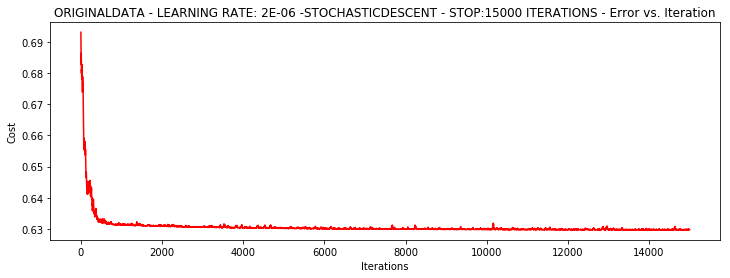

In [37]:
runExpe(orig_data, theta, 1, STOP_ITER, thresh=15000, alpha=0.000002)

速度快，但稳定性差，需要很小的学习率

Mini-batch descent

***Originaldata - learning rate: 0.001 -Mini-batch(15000)descent - Stop:15000 iterations
Theta: [[-1.03517039  0.02334388 -0.00650351]] - Iter: 15000 - Last cost: 0.62 - Duration: 1.66s


array([[-1.03517039,  0.02334388, -0.00650351]])

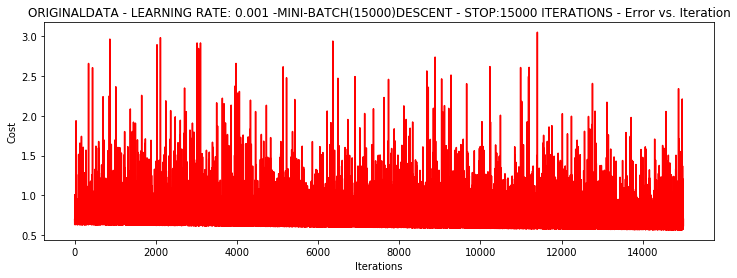

In [38]:
runExpe(orig_data, theta, 16, STOP_ITER, thresh=15000, alpha=0.001)

浮动仍然比较大，我们来尝试下对数据进行<b>标准化</b>
将数据按其属性(按列进行)减去其均值，然后除以其方差。最后得到的结果是，对每个属性/每列来说所有数据都聚集在0附近，方差值为1

***Scaleddata - learning rate: 0.001 -Gradientdescent - Stop:5000 iterations
Theta: [[0.3080807  0.86494967 0.77367651]] - Iter: 5000 - Last cost: 0.38 - Duration: 1.36s


array([[0.3080807 , 0.86494967, 0.77367651]])

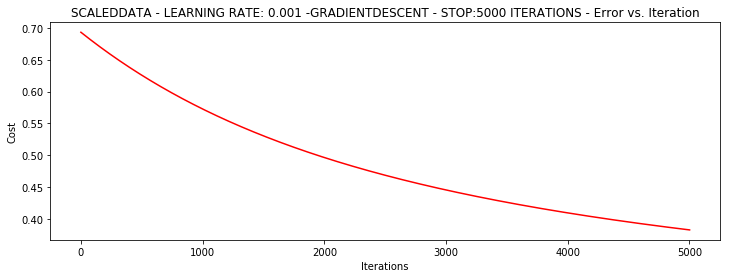

In [39]:
from sklearn import preprocessing as pp

scaled_data = orig_data.copy()
scaled_data[:, 1:3] = pp.scale(orig_data[:, 1:3])

runExpe(scaled_data, theta, n, STOP_ITER, thresh=5000, alpha=0.001)

它好多了！原始数据，只能达到达到0.61，而我们得到了0.38个在这里！
所以对数据做预处理是非常重要的

***Scaleddata - learning rate: 0.001 -Gradientdescent - Stop:gradient norm < 0.02
Theta: [[1.0707921  2.63030842 2.41079787]] - Iter: 59422 - Last cost: 0.22 - Duration: 18.28s


array([[1.0707921 , 2.63030842, 2.41079787]])

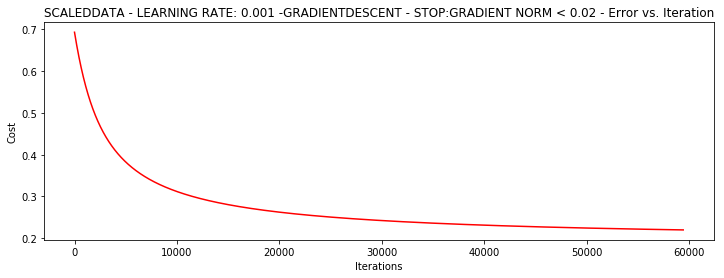

In [40]:
runExpe(scaled_data, theta, n, STOP_GRAD, thresh=0.02, alpha=0.001)

更多的迭代次数会使得损失下降的更多！